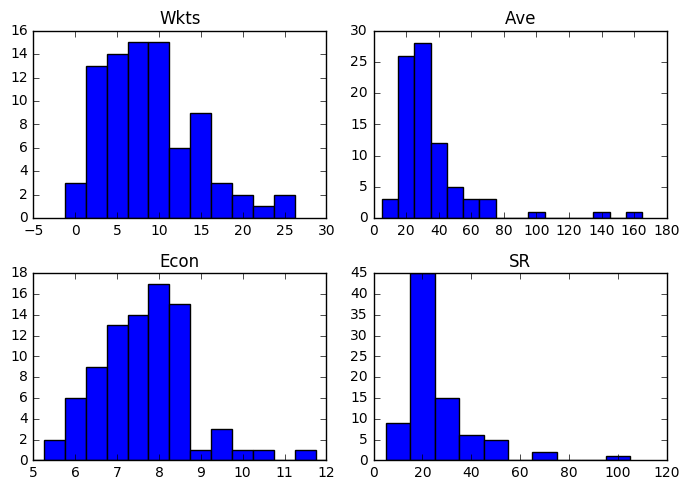

					Individual Histograms for Bowling Variables


In [2]:
import numpy as np
import csv
from matplotlib import pyplot as plt
import pandas as pd
from numpy import linalg
from scipy.stats import binned_statistic
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

bowlingdata = defaultdict(list)

with open('bowling_data.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        for (key,value) in row.items():
            if key == "'Name'": 
                bowlingdata[key].append(value)
            else:
                bowlingdata[key].append(float(value))
            

plt.figure(figsize=(7,5))

hist,bins = np.histogram(bowlingdata["'Wkts'"],bins=np.arange(-1.25,28.75,2.5))
width = (bins[1] - bins[0])
bin_center = 0.5*(bins[:-1] + bins[1:])
plt.subplot(2,2,1),plt.bar(bin_center,hist,align='center',width=width),plt.title("Wkts"),plt.tight_layout()

hist,bins = np.histogram(bowlingdata["'Ave'"],bins=np.arange(5,175,10))
width = (bins[1] - bins[0])
bin_center = 0.5*(bins[:-1] + bins[1:])
plt.subplot(2,2,2),plt.bar(bin_center,hist,align='center',width=width),plt.title("Ave"),plt.tight_layout()

hist,bins = np.histogram(bowlingdata["'Econ'"],bins=np.arange(0.25,12.75,0.5))
width = (bins[1] - bins[0])
bin_center = 0.5*(bins[:-1] + bins[1:])
plt.subplot(2,2,3),plt.bar(bin_center,hist,align='center',width=width),plt.title("Econ"),plt.tight_layout()
plt.xlim(5,12)

hist,bins = np.histogram(bowlingdata["'SR'"],bins=np.arange(5,115,10))
width =(bins[1] - bins[0])
bin_center = 0.5*(bins[:-1] + bins[1:])

plt.subplot(2,2,4),plt.bar(bin_center,hist,align='center',width=width),plt.title("SR"),plt.tight_layout()
plt.show()

print "\t\t\t\t\tIndividual Histograms for Bowling Variables"

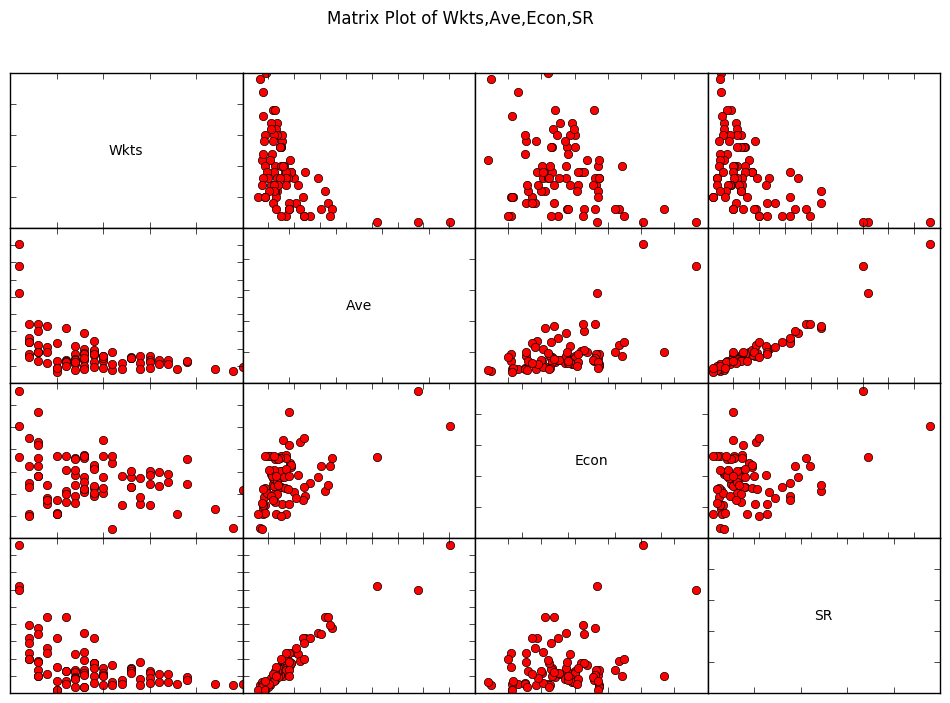

				Fig - Correlation Structure of Bowling Variables


In [3]:
plt.figure(figsize=(12,8))
ax = [plt.subplot(4,4,i+1) for i in range(16)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

plt.suptitle('Matrix Plot of Wkts,Ave,Econ,SR',fontsize=12)
plt.subplot(4,4,1),plt.text(0.5, 0.5,'Wkts',horizontalalignment='center',verticalalignment='center')
plt.subplot(4,4,2),plt.plot(bowlingdata["'Ave'"],bowlingdata["'Wkts'"],'ro'),plt.yticks([])
plt.subplot(4,4,3),plt.plot(bowlingdata["'Econ'"],bowlingdata["'Wkts'"],'ro'),plt.yticks([])
plt.subplot(4,4,4),plt.plot(bowlingdata["'SR'"],bowlingdata["'Wkts'"],'ro'),plt.yticks([])

plt.subplot(4,4,5),plt.plot(bowlingdata["'Wkts'"],bowlingdata["'Ave'"],'ro')
plt.subplot(4,4,6),plt.text(0.5, 0.5,'Ave',horizontalalignment='center',verticalalignment='center')
plt.subplot(4,4,7),plt.plot(bowlingdata["'Econ'"],bowlingdata["'Ave'"],'ro'),plt.yticks([])
plt.subplot(4,4,8),plt.plot(bowlingdata["'SR'"],bowlingdata["'Ave'"],'ro'),plt.yticks([])

plt.subplot(4,4,9),plt.plot(bowlingdata["'Wkts'"],bowlingdata["'Econ'"],'ro')
plt.subplot(4,4,10),plt.plot(bowlingdata["'Ave'"],bowlingdata["'Econ'"],'ro'),plt.yticks([])
plt.subplot(4,4,11),plt.text(0.5, 0.5,'Econ',horizontalalignment='center',verticalalignment='center')
plt.subplot(4,4,12),plt.plot(bowlingdata["'SR'"],bowlingdata["'Econ'"],'ro'),plt.yticks([])

plt.subplot(4,4,13),plt.plot(bowlingdata["'Wkts'"],bowlingdata["'SR'"],'ro')
plt.subplot(4,4,14),plt.plot(bowlingdata["'Ave'"],bowlingdata["'SR'"],'ro')
plt.subplot(4,4,15),plt.plot(bowlingdata["'Econ'"],bowlingdata["'SR'"],'ro'),plt.yticks([])
plt.subplot(4,4,16),plt.text(0.5, 0.5,'SR',horizontalalignment='center',verticalalignment='center')

plt.show()
print "\t\t\t\tFig - Correlation Structure of Bowling Variables"


Sample Correlation Matrix for 83 Bowlers. 
[[ 1.         -0.49053369 -0.292454   -0.51234375]
 [-0.49053369  1.          0.52261724  0.96309841]
 [-0.292454    0.52261724  1.          0.32773743]
 [-0.51234375  0.96309841  0.32773743  1.        ]]
Eigenvectors using Cor_mat
[[ 0.42820758 -0.83847195 -0.33487615  0.03822333]
 [-0.59116833 -0.35390517  0.04764188 -0.72318835]
 [-0.38341538  0.168154   -0.89162604  0.17239454]
 [-0.5658188  -0.37873493  0.30098375  0.66769582]]

Eigenvalues using Cor_mat
[ 2.61606918  0.62018101  0.75160217  0.01214765]


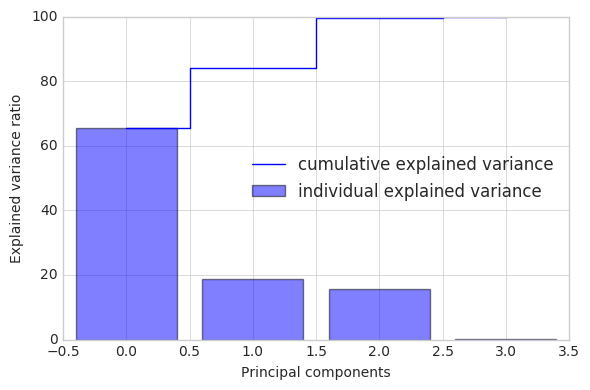

Eigenvalues in descending order:	[ 2.61606918  0.75160217  0.62018101  0.01214765]
Total Variability(in %):		[ 65.40172957  18.79005415  15.50452514   0.30369114]
EigneValue & EigenVector Pairs for the Sample Correlation Matrix:
[[ 2.61606918  0.75160217  0.62018101  0.01214765]
 [ 0.42820758 -0.33487615 -0.83847195  0.03822333]
 [-0.59116833  0.04764188 -0.35390517 -0.72318835]
 [-0.38341538 -0.89162604  0.168154    0.17239454]
 [-0.5658188   0.30098375 -0.37873493  0.66769582]]


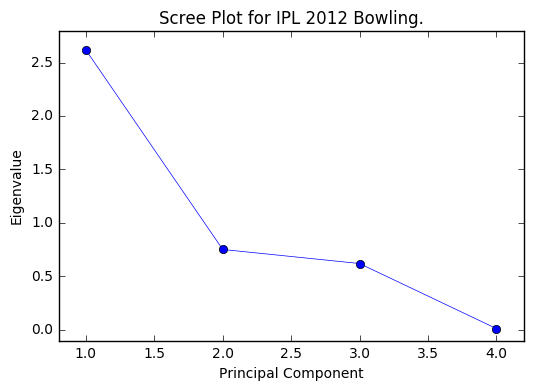

In [4]:
X=[]
X.append(bowlingdata["'Wkts'"])
X.append(bowlingdata["'Ave'"])
X.append(bowlingdata["'Econ'"])
X.append(bowlingdata["'SR'"])
X = np.asarray(X).T
X_std = StandardScaler().fit_transform(X)

'''
mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Sample Correlation Matrix for 90 Batsmen.\n%s' %cov_mat)

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors using Cov_mat\n%s' %eig_vecs)
print('\nEigenvalues using Cov_mat\n%s' %eig_vals)
'''
cor_mat = np.corrcoef(X_std.T)
print('\nSample Correlation Matrix for 83 Bowlers. \n%s' %cor_mat)
eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors using Cor_mat\n%s' %eig_vecs)
print('\nEigenvalues using Cor_mat\n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
E = []
EigValEigVecPair = np.zeros((5,4))
j=0
for i in eig_pairs:
    EigValEigVecPair[1:,j] = np.asarray(i[1]).reshape(4,1).T
    E.append(i[0])
    j+=1
    
    
EigValEigVecPair[0,:] = np.asarray(E)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
E = np.asarray(E)
PercentageVariability = []
for i in range(len(E)):
    PercentageVariability.append((E[i]/sum(E))*100.0)

PercentageVariability = np.asarray(PercentageVariability)
print 'Eigenvalues in descending order:\t',E
print 'Total Variability(in %):\t\t',PercentageVariability
print 'EigneValue & EigenVector Pairs for the Sample Correlation Matrix:\n',EigValEigVecPair
num_vars = 4
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, E, 'bo-', linewidth = 0.5),plt.title('Scree Plot for IPL 2012 Bowling.')
plt.xlabel('Principal Component'),plt.ylabel('Eigenvalue')
plt.xlim([0.8,4.2]),plt.ylim([-0.1,2.8]),
plt.show()

def rankindex(obs,PC = EigValEigVecPair[1:,0]):
    return np.dot(PC,np.asarray(obs).T)
    

In [20]:
RankIdx = []
for i in range(X.shape[0]):
    RankIdx.append(rankindex(X_std[i,:]))
D = defaultdict(list)
for i in range(len(RankIdx)):
    D[RankIdx[i]].append(bowlingdata["'Name'"][i])
index=sorted(RankIdx)
print 'Ranking of Bowlers based on the first principle component L1\n'
print 'Rank\tPlayer Name\tL1 Value'
for i in range(len(RankIdx)):
    print i+1,'\t',D[index[len(RankIdx)-i-1]][0],'\t','{0:.2f}'.format(index[i])
    #print '{} {} {}'.format((i+1),D[index[len(RankIdx)-i-1]][0],index[i])

Ranking of Bowlers based on the first principle component L1

Rank	Player Name	L1 Value
1 	'SP Narine' 	-7.39
2 	'SL Malinga' 	-6.29
3 	'M Morkel' 	-4.52
4 	'DW Steyn' 	-2.52
5 	'L Balaji' 	-2.50
6 	'M Muralitharan' 	-2.18
7 	'BW Hilfenhaus' 	-2.03
8 	'Shakib Al Hasan' 	-1.87
9 	'UT Yadav' 	-1.65
10 	'AB McDonald' 	-1.56
11 	'P Awana' 	-1.43
12 	'AD Mascarenhas' 	-1.39
13 	'KA Pollard' 	-1.30
14 	'K Cooper' 	-1.24
15 	'Z Khan' 	-0.94
16 	'PP Chawla' 	-0.91
17 	'RJ Harris' 	-0.68
18 	'R Vinay Kumar' 	-0.67
19 	'A Chandila' 	-0.65
20 	'AB Dinda' 	-0.62
21 	'Azhar Mahmood' 	-0.35
22 	'MM Patel' 	-0.33
23 	'JH Kallis' 	-0.31
24 	'RA Jadeja' 	-0.29
25 	'R Ashwin' 	-0.29
26 	'P Negi' 	-0.28
27 	'GB Hogg' 	-0.23
28 	'SK Trivedi' 	-0.19
29 	'R Bhatia' 	-0.13
30 	'PP Ojha' 	-0.05
31 	'DJ Bravo' 	-0.05
32 	'A Ashish Reddy' 	-0.04
33 	'JA Morkel' 	-0.03
34 	'A Mishra' 	0.01
35 	'SW Tait' 	0.01
36 	'WD Parnell' 	0.03
37 	'JEC Franklin' 	0.08
38 	'DE Bollinger' 	0.15
39 	'KMDN Kulasekara' 	0.19
40 